オリジナルの作成：2015/06/27

ここで紹介したSageワークシートは、以下のURLからダウンロードできます。

- http://www15191ue.sakura.ne.jp:8000/home/pub/52/

また、Sageのサーバを公開しているサイト（ http://www15191ue.sakura.ne.jp:8000/ ）にユーザIDを作成することで、ダウンロードしたワークシートをアップロードし、実行したり、変更していろいろ動きを試すことができます。

# 0M-ソフトウェアラジオその１（AM波）
## ソフトウェアラジオ（Software Design Radio）AMラジオ編
トランジスタ技術別冊トラ技Jr 2015/3.4号に紹介されている「第1回パソコンでAMラジオ放送を聴く」をMacで試してみました。

### ブレッドボードで作ったAMラジオ
ソフトウェアラジオ（Software Design Radio）AMラジオ編は、サポートページでより詳しく説明されています。

- [第1回 パソコンでAMラジオ放送を聴く(補足資料)](http://www.mybook-pub-site.sakura.ne.jp/TG_Jr/Appendix_2015_2_10.pdf)

私の作成した「ブレッドボードで作ったAMラジオ」は、以下の様な物です。


<img src="images/0M/th_SoftWareRadio.jpg" width="400" />

### Mac用ソフトウェアラジオ・アプリケーション
第1回パソコンでAMラジオ放送を聴く」で紹介されているソフトウェアラジオのPC用アプリケーションは、 SDRadio.exe ver.0.99というWindows用のアプリです。

私は、Mac OSXを使っているので、Mac用のソフトウェアラジオ・アプリケーションを探しました。 今回「ブレッドボードで作ったAMラジオ」の再生用に使ったのは、 
[Dream 1.11](http://dl2sdr.homepage.t-online.de/)
です。

Dreamを起動し、入力をマイクとし、DemodulationをAMにし、15kHzあたりのピークをクリックすると赤い線がそこに移動します。 次にFilter Bandwidthを5kHz程度にするとラジオの放送が聞こえてきます。

<img src="images/0M/th_dream.jpg" width="500" />

私の住む高岡市で最も電波の強い放送局は北日本放送（738kHz）です。 Dreamで受信した北日本放送は、以下の様な音でした。音声は小さいですがアナウンサーの声が聞き取れます。

「ブレッドボードで作ったAMラジオ」で受信した放送の一部
- [KNB_radio.wav](data/KNB_radio.wav)

### 「ブレッドボードで作ったAMラジオ」の構成
「ブレッドボードで作ったAMラジオ」の構成を回路をトラ技Jの図1から引用します。

<img src="images/0M/Fig_1.png" width="500" />

ブレッドボードで処理しているのは、同調・講習は増幅、局部発振、ミキサの３つの機能だけです。 どうしてこんな単純なもので、ソフトウェアラジオが聞こえるのか不思議ですね。

### 「ブレッドボードで作ったAMラジオ」の回路
「ブレッドボードで作ったAMラジオ」の回路をトラ技Jの図7から引用します。

<img src="images/0M/th_Fig_7.jpg" width="500" />

## 「ブレッドボードで作ったAMラジオ」の仕組み
第1回 パソコンでAMラジオ放送を聴く(補足資料)の4.1に周波数変換の原理について説明があります。

ミキサの原理は、放送波を$v_{rin} = sin(2 \pi f_r t)$、局部発振の出力を$v_{LO} = sin(2 \pi f_{LO}t)$とすると、
ミキサーからでる信号は、以下の様になります。

$$
\begin{eqnarray}
v_{mix}  & = & sin(2 \pi f_r t) \times sin(2 \pi f_{LO} t) \\
& = & \frac{1}{2} \left \{ -cos(2\pi(f_r + f_{LO})t) + cos(2\pi(f_r - f_{LO})t) \right \}
\end{eqnarray}
$$      
   
つまり、$f_r - f_{LO}$の周波数を持つ低い波と$f_r + f_{LO}$の周波数を持つ高い波の2つの信号に分けることができます。
ローパスフィルターを使って高い波を取り除くと、$f_r - f_{LO}$の低い周波数帯で放送波を扱うことができます。
これが、ミキサによる周波数変換のマジックです。

ミキサの原理を第1回 パソコンでAMラジオ放送を聴く(補足資料)から図A.14を引用します。

<img src="images/0M/Fig.A_14.png" width="400" />

AM波では、バンド幅を15kHzとしているので、北日本放送（738kHz）に対する局部発振周波数は、753kHzになります。 「ブレッドボードで作ったAMラジオ」の発振モジュール（秋月のLTC1799）の周波数をみてみると753kHzになっています。

<img src="images/0M/freq.png" width="400" />

## Sageを使ってAM変調試す
実際にAM放送の信号が局部発振波（ここではsin波）を使ったミキサによって音声（ここでは2kHzのsin波）が取り出される様子を Sageを使って見てみましょう。

### 搬送波
周波数が100kHz（北日本放送ではこれが738kHzです）で振幅1のsin波をVc(t)を定義し、Tend(0.002秒)まで出力してみます。

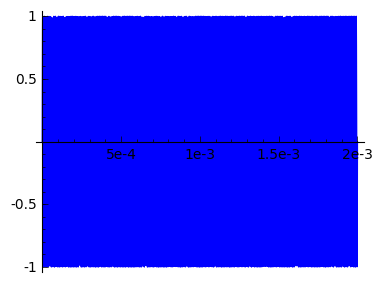

In [1]:
t= var('t')
Tend = 0.002
fc = 100000     # 100kHz
Vcm = 1.0
Vc(t) = Vcm*sin(2*pi*fc*t)
plot(Vc(t), [t, 0, Tend], figsize=4)

### 音声として2kHzのcos波
次に音声の代わりに2kHzのcos波をVs(t)と定義し、プロットします。

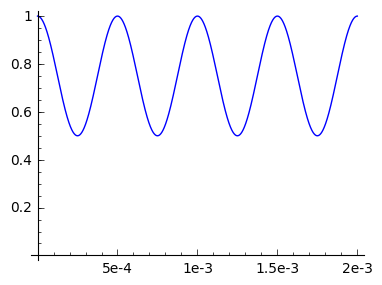

In [2]:
fs = 2000    # 2kHz
Vsm = 0.25
Vs(t) = Vsm*cos(2*pi*fs*t)+0.75
plot(Vs(t), [t, 0, Tend], figsize=4, ymin=0)

### AM変調
WikipediaによるとAM変調は、以下の様に定義されています。

$$
V_{am}=(V_s+V_{cm})sin 2\pi f_c t
$$
定義にそってAM変調された波をVam(t)を定義し、プロットします。 AM変調では、上下のエンベロープ（信号の端の形）に音声信号が現れます。

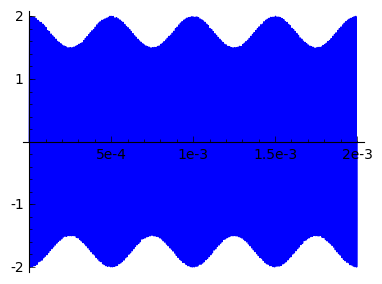

In [3]:
Vam(t) = (Vs(t) + Vcm)*sin(2*pi*fc*t)
plot(Vam(t), [t, 0, Tend], figsize=4)

## 局部発振とのミキサ
搬送波+15kHzの局部発振のsin波とVam(t)と掛け合わせると、以下の様に15kHzの波で音声波が 見えてきます。



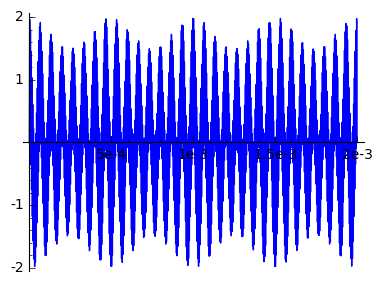

In [4]:
band = 15000 # 15kHz
Vcros(t) = Vam(t)*sin(2*pi*(fc+band)*t)
plot(Vcros(t), [t, 0, Tend], figsize=4)

### AM波の復調
AM変調の復調には、ミキサされた信号を絶対値absを使って片方向に揃えます。 これで、音声の2kHzの形がぼんやり見えてきます。

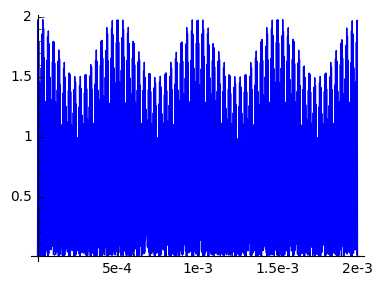

In [5]:
plot(abs(Vcros(t)), [t, 0, Tend], figsize=4)

### ローパスフィルターを掛ける
scipyを使ってローパスフィルター（butter_lowpass_filter関数）を定義します。

In [6]:
# scipyを使う準備
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

/usr/lib/sagemath/local/lib/python2.7/site-packages/traitlets/traitlets.py:770: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new @observe(change) API
  clsname, change_or_name), DeprecationWarning)


In [7]:
# ローパスフィルターを定義
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

### サンプリングとフィルタリング
サンプリングレートは、96kHzとし、ローパスフィルターのカットオフ周波数を4kHzとしました。

In [8]:
# フィルターの仕様を決定
order = 6
fs = 96000.0     # サンプリングレート（ 96kHz）
cutoff = 4000.0  # カットオフ周波数（ 4kHz）

In [9]:
# scipyを使ってローパスフィルターを掛けるため、96kHzでサンプリング
T = Tend
n = int(T*fs)
t = np.linspace(0, T, n, endpoint=False)
# データを作成
data = [abs(Vcros(t_i)).n() for t_i in t]

ローパスフィルタを掛けた結果yとサンプリングデータdataをプロットします。 緑のフィルター後の波形に2kHzの波が取り出されています。

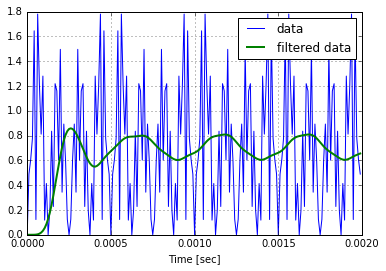

In [10]:
# dataにローパスフィルターを掛けて、オリジナルデータとフィルター後のデータを表示
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.figure()
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()
plt.savefig('data/LPF.png')

## スイッチによる方形波
局発のスイッチによる方形波をpiecewise使って以下の様に定義します。これから求まるフーリェ級数から、 奇数倍の周波数のsin波の足し合わせになっていることがわかります。

verbose 0 (3757: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 100 points.
verbose 0 (3757: plot.py, generate_plot_points) Last error message: 'point 0.990150753769 is not in the domain'


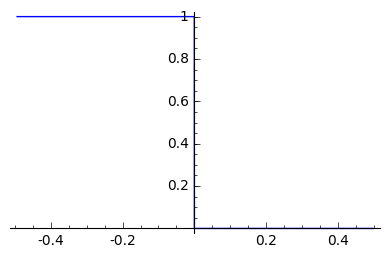

In [11]:
# 方形波が周波数が奇数倍のsin波を足し合わせたもの
# フーリェ級数の係数を求めます。
g = piecewise([[(-1/2,0), lambda x: 1], [(0, 1/2),lambda x:0]])
plot(g, figsize=4)

$v_{LO}$は、以下の様になります。

$$
v_{LO} = \frac{1}{2} + \frac{2 \,
\sin\left(2 \, \pi x\right)}{\pi} + \frac{2 \, \sin\left(6 \, \pi x\right)}{3 \, \pi}  +  ...
$$         

次数を変えて、フーリェ級数で表される方形波をみてみましょう。nを31にすると定義の波に近くなりますが、
値が急に変わる不連続点では急な盛り上がりがでます。これはギブスの現象と呼ばれるものです。

In [12]:
# フーリェ級数
show(g.fourier_series_partial_sum(7,1/2))

-2/5*sin(10*pi*x)/pi - 2/3*sin(6*pi*x)/pi - 2*sin(2*pi*x)/pi + 1/2

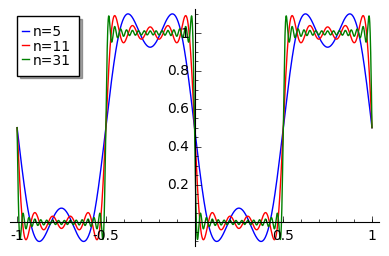

In [13]:
p = plot(g.fourier_series_partial_sum(5, 1/2), -1,1, color='blue',legend_label='n=5')
p += plot(g.fourier_series_partial_sum(11, 1/2), -1,1, color='red',legend_label='n=11')
p += plot(g.fourier_series_partial_sum(31, 1/2), -1,1, color='green',legend_label='n=31')

p.show(figsize=4)

入力波が$v_{Rin} = V sin(2\pi f_{Rin} t)$とすると、以下のように$v_{mix}$には、$f_{Rin}$、$f_{Rin} + f_{LO}$と$f_{Rin} - f_{LO}$成分が含まれます。

これにローパスフィルターを掛けることによって$v_{mix}$の$f_{Rin} - f_{LO}$成分のみが取り出されます。

$$
\begin{eqnarray}
v_{mix}  & = & v_{Rin} \times v_{LO} \\
& = & \frac{V}{2} sin(2 \pi f_{Rin} t) + \frac{V}{2\pi} \left \{ -cos(2\pi(f_{Rin} + f_{LO})t) + cos(2\pi(f_{Rin} - f_{LO})t) \right \} + ...
\end{eqnarray}
$$  